# Clustering & PCA Assignment

**Instructions to run the code**
    
    1. Do not alter any file name.
    2. Keep the folder structure intact.
    3. Keep all the files in folder where python notebook is located.
    4. Few verification steps are purposely added. Uncomment them and execute as and when required.</font>

**Folder Structure**  <br>
```Clustering & PCA Assignment``` #Main Folder
>```Country-data``` #Data file<br>

<font color=blue> **Read Data**	<br>
* Import important libraries	<br>
* Read country data into dataframe	<br>
* Shape of country_data dataframe	<br>
* Quick review of country_data dataframe	<br>
* Converting % GDP columns	<br>
	
**Analyze Data**	<br>
* Check for missing values	<br>
	
**Data Preparation for Modeling**	<br>
* Use standard scaler to scale the numerical data	<br>
	
**Find Principal Components using PCA**	
* Initiate PCA object, fit object and review components	<br>
* Scree plot to check variance explained by PCs	<br>
* Building PCA for country data using optimal PCs(5)	<br>
* Heatmap to verify multicollinearity	<br>
* Outlier Analysis on PCs	<br>
* Remove outliers from PC dataframe	<br>
* Check hopkins score	<br>
	
**Clustering using KMeans**	<br>
* Optimal cluster using elbow curve	<br>
* Optimal cluster using silhouette score	<br>
* Building model using optimal cluster(k)	<br>
* Visualizing clusters formed by kmeans	<br>
	
**Clustering using Hierarchical clustering**	<br>
* Using single linkage (Minimum distance)	<br>
* Optimal cluster using silhouette score	<br>
* Visualizing clusters formed by Hierarchical	<br>
	
**Conclusion**	<br>
* List countries in cluster with lowest income, lowest gdpp and highest child mort	<br>

### Import important libraries

In [1]:
# Import important Libraries
import numpy as np
import pandas as pd

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Ignore future warnings
warnings.simplefilter('ignore', FutureWarning)

pd.set_option("display.max_rows", 500)

# Libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for data modelling
import sklearn

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

###  Read Data

#### Read country data into dataframe

In [2]:
# Read data into dataframe
country_data = pd.read_csv(r"./Country-data.csv")
country_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


#### Shape of country_data dataframe

In [3]:
# Shape of dataframe
country_data.shape

(167, 10)

#### Quick review of country_data dataframe

In [4]:
# Check datatype and info of dataframe
country_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


#### Converting % GDP columns

In [5]:
# Converting % GDP columns to absolute values
country_data["exports"] = (country_data["exports"] * country_data["gdpp"]) / 100
country_data["imports"] = (country_data["imports"] * country_data["gdpp"]) / 100
country_data["health"] = (country_data["health"] * country_data["gdpp"]) / 100

### Analyze data

#### Check for missing values

In [6]:
# Missing values
country_data.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

There are no missing values in the data

### Data Preparation for Modeling

#### Use standard scaler to scale the numerical data

In [7]:
# Use standard scaler to scale the numerical data
#Create list of numeric columns
numcols = list(country_data.select_dtypes(exclude="object"))

scaler = StandardScaler()
country_data_scaled = scaler.fit_transform(country_data[numcols])

C:\Users\rush2\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\rush2\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [8]:
# Review data after scaling
country_data_scaled

array([[ 1.29153238, -0.4110113 , -0.56503989, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.35019096, -0.43921769, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.31852577, -0.48482608, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541, -0.36146329, -0.53848844, ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.39216643, -0.55059641, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.38395214, -0.54049845, ..., -2.09278484,
         1.6246091 , -0.62954556]])

#### Hopkins statstics

In [9]:
# Creating feature to calcualte Hopkins Statistics

from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
import pandas as pd
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

#Use the Hopkins Statistic function by passing the above dataframe as a paramter
# hopkins(country_data[numcols])

country_data_scaled_df = pd.DataFrame(country_data_scaled)

hopkins(country_data_scaled_df)

0.9429903707130809

Observations:-
* Score greater than 0.80 indicates that data has high tendency to cluster.

### Find Principal Components using PCA

#### Initiate PCA object, fit object and review components

In [10]:
# Initiate object
pca = PCA(random_state=100)

# Fit object
pca.fit(country_data_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=100,
  svd_solver='auto', tol=0.0, whiten=False)

In [11]:
# Review components
pca.components_

array([[-0.31639186,  0.34288671,  0.358535  ,  0.34486492,  0.38004113,
        -0.14308531,  0.34385651, -0.30284224,  0.39998795],
       [ 0.47626735,  0.39731091,  0.1550529 ,  0.37078075,  0.12838448,
         0.22126089, -0.36981973,  0.4597152 ,  0.2006241 ],
       [-0.15001225, -0.03057367, -0.07570322, -0.07217386,  0.14576421,
         0.94841868,  0.19675173, -0.07783431,  0.01033941],
       [-0.14805195,  0.44942527, -0.59971228,  0.46179779, -0.15480592,
        -0.00762798, -0.01839465, -0.21392805, -0.36477239],
       [ 0.1019948 , -0.03853829, -0.49319984, -0.2527867 ,  0.79407469,
        -0.13642345, -0.15404105, -0.02033568,  0.08750149],
       [ 0.19658519, -0.03891112,  0.18069888, -0.01217988, -0.03814681,
         0.10840284, -0.58600986, -0.75390075,  0.04538167],
       [ 0.76126725, -0.01366973, -0.06461567,  0.02718244, -0.02311312,
        -0.02207663,  0.58120846, -0.27314534, -0.04402264],
       [ 0.00644411, -0.05526371,  0.43007213,  0.1311355 ,  0

#### Scree plot to check variance explained by PCs

In [12]:
# Calculate cummulative probability
cum_prob = np.cumsum(pca.explained_variance_ratio_)

print(cum_prob)

[0.58937298 0.77382467 0.87293939 0.93366217 0.96395389 0.98855216
 0.9979496  0.99950602 1.        ]


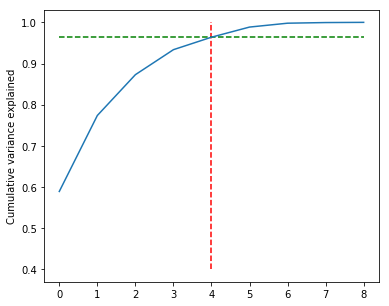

In [13]:
# Plot cummulative probability
fig = plt.figure(figsize=[6,5])
plt.vlines(x=4, ymax=1, ymin=0.4, colors="r", linestyles="--")
plt.hlines(y=0.9639, xmax=8, xmin=0, colors="g", linestyles="--")
plt.plot(cum_prob)
plt.ylabel("Cumulative variance explained")
plt.show()

Observations:-
1. About 95% variance is explained by 5 PCs
2. We will perform PCA with 5 components

In [14]:
# Checking how much each PC is explaning feature
colnames = list(country_data[numcols].columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1],'PC3':pca.components_[2],
                       'PC4':pca.components_[3],'PC5':pca.components_[4],
                       'PC6':pca.components_[5],'PC7':pca.components_[6],'PC8':pca.components_[7],
                       'PC9':pca.components_[8],'Feature':colnames})

pcs_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,Feature
0,-0.316392,0.476267,-0.150012,-0.148052,0.101995,0.196585,0.761267,0.006444,-0.004951,child_mort
1,0.342887,0.397311,-0.030574,0.449425,-0.038538,-0.038911,-0.013670,-0.055264,-0.717924,exports
2,0.358535,0.155053,-0.075703,-0.599712,-0.493200,0.180699,-0.064616,0.430072,-0.130346,health
3,0.344865,0.370781,-0.072174,0.461798,-0.252787,-0.012180,0.027182,0.131135,0.665687,imports
4,0.380041,0.128384,0.145764,-0.154806,0.794075,-0.038147,-0.023113,0.393811,0.079011,income
5,-0.143085,0.221261,0.948419,-0.007628,-0.136423,0.108403,-0.022077,-0.006070,0.011281,inflation
6,0.343857,-0.369820,0.196752,-0.018395,-0.154041,-0.586010,0.581208,0.002966,-0.031594,life_expec
7,-0.302842,0.459715,-0.077834,-0.213928,-0.020336,-0.753901,-0.273145,0.034293,0.023682,total_fer
8,0.399988,0.200624,0.010339,-0.364772,0.087501,0.045382,-0.044023,-0.799022,0.128464,gdpp


#### Building PCA for country data using optimal PCs(5)

In [15]:
# Building PCA for country data
pca_final = IncrementalPCA(n_components=5)
country_pca = pca_final.fit_transform(country_data_scaled)

In [16]:
# Checking shape of dataframe
country_pca.shape

(167, 5)

In [17]:
# Checking correlation for the PCs
corrmat = np.corrcoef(country_pca.transpose())

#### Heatmap to verify multicollinearity

Text(0.5, 1.0, 'Correlation between PCs')

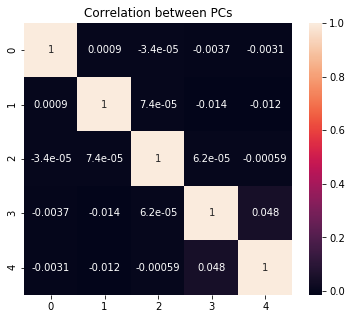

In [18]:
# Plotting heatmap
plt.figure(figsize=[6,5])
sns.heatmap(corrmat, annot=True)
plt.title("Correlation between PCs")

#### Checking Hopkins score again

In [19]:
#  Checking Hopkins score again
hopkins(pd.DataFrame(country_pca))

0.9088645424934926

Observations:-
* Score greater than 0.80 indicates that data has high tendency to cluster.

In [20]:
# Create a dataframe with columns (PCs)
df_pcs = pd.DataFrame(country_pca, columns=["PC1", "PC2", "PC3", "PC4", "PC5"])
df_pcs.head()

,PC1,PC2,PC3,PC4,PC5
0,-2.636338,1.472260,-0.548330,0.238302,0.061003
1,-0.023783,-1.435535,-0.015470,-0.428278,-0.154305
2,-0.459228,-0.679705,0.956537,-0.193531,-0.092128
3,-2.723472,2.174966,0.597397,0.417695,0.056694
4,0.649103,-1.026404,-0.258645,-0.276882,0.077087


#### Outlier Analysis on PCs

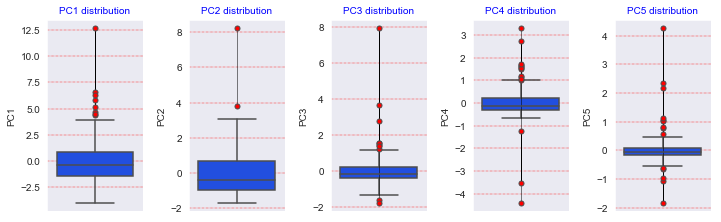

In [21]:
# Analyze outliers for quantitative variables

pca_cols = df_pcs.columns

# calculation for subplots
ln = len(pca_cols)
n=5
m=(ln//n)+1
ct=1


# Setting figure size
plt.figure(2,figsize=(10,6))

for cat in pca_cols:
    sns.set_style("dark")
    plt.subplot(m,n,ct)
    plt.grid(color='r', linestyle='-.', linewidth=0.4)
    flierprops = dict(marker='o',markerfacecolor='red', markersize=5,linewidth=0.5,
                linestyle='-')
    
    sns.boxplot(y=df_pcs[cat],palette="bright",flierprops=flierprops)
    title = cat + " distribution"
    plt.title(title,color="b",fontsize=10)
    plt.yticks(fontsize=10)
    plt.xticks(fontsize=10,rotation=90)
    ct+=1
    
# plt.legend(bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

In [22]:
# Check shape
df_pcs.shape

(167, 5)

In [23]:
# Store country_id
country_id = country_data["country"]

In [24]:
# Add country to df_pcs dataframe
df_pcs["country"] = country_id
df_pcs.head()

,PC1,PC2,PC3,PC4,PC5,country
0,-2.636338,1.472260,-0.548330,0.238302,0.061003,Afghanistan
1,-0.023783,-1.435535,-0.015470,-0.428278,-0.154305,Albania
2,-0.459228,-0.679705,0.956537,-0.193531,-0.092128,Algeria
3,-2.723472,2.174966,0.597397,0.417695,0.056694,Angola
4,0.649103,-1.026404,-0.258645,-0.276882,0.077087,Antigua and Barbuda


#### Remove outliers from PC dataframe

In [25]:
# Display and review data over and below cutoff

# Calculate Inter Quantile Region (75th Percentile - 25th Percentile)
# Upper cutoff = 75th percentile + 1.5 * (IQR)
# Lower cutoff = 25th percentile - 1.5 * (IQR)


print("Shape before outlier removal: ", df_pcs.shape)

 
def removeoutlier(pc_data1,col):
    
    col_q1,col_q3,_col_IQR,lower_cutoff,upper_cutoff = 0,0,0,0,0
    data=pd.DataFrame()
    outlier_data=pd.DataFrame()
    data=pc_data1[col]
    

    col_q1 = data.quantile(q=.25)
    col_q3 = data.quantile(q=.75)
    col_IQR = col_q3 - col_q1
    lower_cutoff = col_q1 - (1.5 * col_IQR)
    upper_cutoff = col_q3 + (1.5 * col_IQR)
    mask1 = (df_pcs[col] > lower_cutoff) & (df_pcs[col] < upper_cutoff)

    if(lower_cutoff==0) | (upper_cutoff==0) | (lower_cutoff == upper_cutoff):
        print("Check cutoff values, it's 0")
        return pc_data1
        pass
    else:
        pc_data1 = pc_data1[mask1]
        return pc_data1

for column in pca_cols:
    df_pcs = removeoutlier(df_pcs,column)
    
print("Shape after outlier removal: ", df_pcs.shape)

Shape before outlier removal:  (167, 6)
Shape after outlier removal:  (131, 6)


#### Check hopkins score

In [26]:
#  Checking Hopkins score again
hopkins(df_pcs.drop("country",axis=1))

0.8125497419929948

### Clustering using KMeans

In [27]:
# Prepare dataframe for KMeans clustering (Drop country columns from df)
country_pca=df_pcs.drop("country",axis=1)

In [28]:
# K-means using intial k as 4
kmeans = KMeans(n_clusters = 4, max_iter=50)
kmeans.fit(country_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [29]:
# Checking to ensure no coutry is dropped
len(kmeans.labels_)

131

#### Optimal cluster using elbow curve

In [30]:
# Using elbow curve to determine optimal k
# kmean`s.intertia_ will give sum of square of distance
ssd = []

for num in range(2,8):
    kmeans =KMeans(n_clusters = num, max_iter=50,random_state=80)
    kmeans.fit(country_pca)
    ssd.append(kmeans.inertia_)

Text(0.5, 1.0, 'Sum of squared distances vs Clusters')

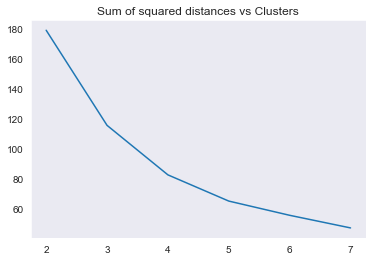

In [31]:
# Plot ssd for various k
x=range(2,8)
y=ssd
plt.plot(x,y)
plt.title("Sum of squared distances vs Clusters")

#### Optimal cluster using silhouette score

In [32]:
sil_score = []

for num in range(2,8):
    kmeans =KMeans(n_clusters = num, max_iter=50,random_state=80)
    kmeans.fit(country_pca)
    silscore=silhouette_score(country_pca,kmeans.labels_)
    sil_score.append(silscore)
    print("For n_clusters={0} silhouette score is {1}".format(num,silscore))

For n_clusters=2 silhouette score is 0.52506185254913
For n_clusters=3 silhouette score is 0.43755259663201096
For n_clusters=4 silhouette score is 0.41808478416110134
For n_clusters=5 silhouette score is 0.36901523105692396
For n_clusters=6 silhouette score is 0.352076484814202
For n_clusters=7 silhouette score is 0.3698115058147673


Text(0.5, 1.0, 'Silhouette score for k')

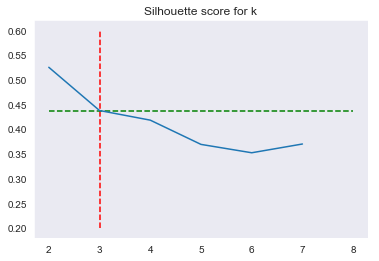

In [33]:
# plot sihouette score for various k
x=range(2,8)
y=sil_score
plt.plot(x,y)
plt.vlines(x=3, ymax=.6, ymin=0.2, colors="r", linestyles="--")
plt.hlines(y=0.4375, xmax=8, xmin=2, colors="g", linestyles="--")
plt.title("Silhouette score for k")

Observations:-
1. Based on elbow curve and Silhouette score optimal number of clusters is 3
2. We will build model/cluster using k=3

#### Building model using optimal cluster(k)

In [34]:
# K-means using n_clusters(k) as 4
kmeans = KMeans(n_clusters = 3, max_iter=50, random_state=100)
kmeans.fit(country_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=100, tol=0.0001, verbose=0)

In [35]:
# Quick review of dataframe
country_pca.head()

,PC1,PC2,PC3,PC4,PC5
0,-2.636338,1.472260,-0.548330,0.238302,0.061003
1,-0.023783,-1.435535,-0.015470,-0.428278,-0.154305
2,-0.459228,-0.679705,0.956537,-0.193531,-0.092128
3,-2.723472,2.174966,0.597397,0.417695,0.056694
4,0.649103,-1.026404,-0.258645,-0.276882,0.077087


In [36]:
# Assigning clusters to data
country_km = pd.concat([df_pcs.reset_index().drop("index",axis=1),pd.Series(kmeans.labels_)],axis=1)
country_km.columns =["PC1","PC2","PC3","PC4","PC5","country","cluster_kmeans"]
country_km.head()

,PC1,PC2,PC3,PC4,PC5,country,cluster_kmeans
0,-2.636338,1.472260,-0.548330,0.238302,0.061003,Afghanistan,1
1,-0.023783,-1.435535,-0.015470,-0.428278,-0.154305,Albania,0
2,-0.459228,-0.679705,0.956537,-0.193531,-0.092128,Algeria,0
3,-2.723472,2.174966,0.597397,0.417695,0.056694,Angola,1
4,0.649103,-1.026404,-0.258645,-0.276882,0.077087,Antigua and Barbuda,2


In [37]:
# Counting countries in each cluster
country_km["cluster_kmeans"].value_counts()

0    65
1    42
2    24
Name: cluster_kmeans, dtype: int64

#### Plot scatterplot for clusters formed using Kmeans

Text(0.5, 1.0, 'Clusters formed using kmeans')

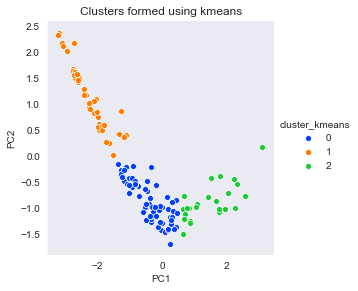

In [38]:
# Plotting clusters -kmeans
sns.pairplot(data=country_km, x_vars=["PC1"], y_vars=["PC2"], hue = "cluster_kmeans", height=4,palette="bright")
plt.title("Clusters formed using kmeans")

In [39]:
# Merge with original data

country_orig = pd.merge(country_data,country_km,on="country",how="inner")
country_orig.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,PC4,PC5,cluster_kmeans
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,-2.636338,1.472260,-0.548330,0.238302,0.061003,1
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,-0.023783,-1.435535,-0.015470,-0.428278,-0.154305,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,-0.459228,-0.679705,0.956537,-0.193531,-0.092128,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,-2.723472,2.174966,0.597397,0.417695,0.056694,1
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0.649103,-1.026404,-0.258645,-0.276882,0.077087,2


In [40]:
# Drop PCs and keep original columns
country_orig.drop(["PC1","PC2","PC3","PC4","PC5"],axis=1,inplace=True)
country_orig.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_kmeans
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,2


In [41]:
# Checking distribution of clusters formed
country_orig["cluster_kmeans"].value_counts()

0    65
1    42
2    24
Name: cluster_kmeans, dtype: int64

#### Visualizing clusters formed by kmeans

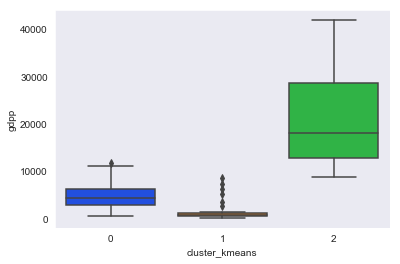

In [42]:
# Plot distribution for gdpp
sns.boxplot(x="cluster_kmeans",y="gdpp",data=country_orig,palette="bright")

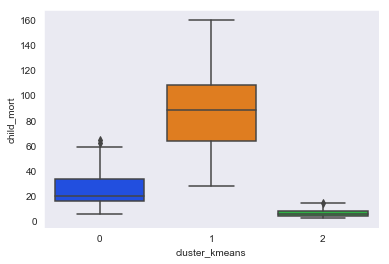

In [43]:
# Plot distribution for child mort
sns.boxplot(x="cluster_kmeans",y="child_mort",data=country_orig,palette="bright")

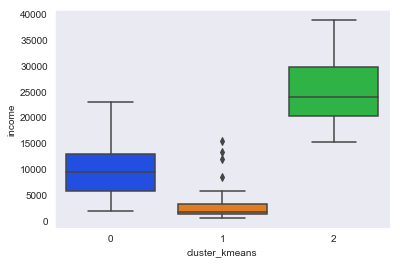

In [44]:
# Plot distribution for income
sns.boxplot(x="cluster_kmeans",y="income",data=country_orig,palette="bright")

Observations:- <br>
* Cluster 0 - Medium gdpp, Medium income, Medium child_mort <br>
* Cluster 1 - Lowest gdpp, Lowest income, Highest child_mort <br>
* Cluster 2 - Highest gdpp, Highest income, Lowest child_mort <br>

### Clustering using Hierarchical clustering

#### Using single linkage (Minimum distance)

[]

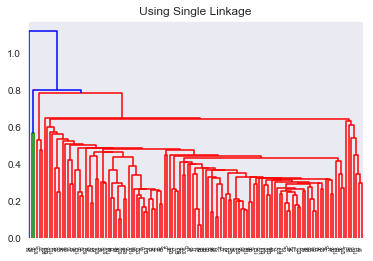

In [45]:
# Using single linkage (Minimum distance)
mergings = linkage(country_pca,method="single",metric="euclidean")
dendrogram(mergings)
plt.title("Using Single Linkage")
plt.plot()

#### Using complete linkage (Maximum distance)

[]

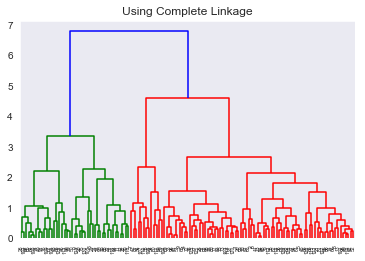

In [46]:
# Using complete linkage (Maximum distance)
mergings = linkage(country_pca,method="complete",metric="euclidean")
dendrogram(mergings)
plt.title("Using Complete Linkage")
plt.plot()

Observations:-
1. We see clear defined clusters using linkage=compelte.
2. We will go with 4 clsuters as they are clearly defined

In [47]:
# Assigning clusters to data using Hierarchical clustering
country_orig["cluster_hierarchical"] = cut_tree(mergings,n_clusters=4)
country_orig.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_kmeans,cluster_hierarchical
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,1,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,0,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,0,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,1,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,2,1


In [48]:
# Assign clusters formed using Hierarchical
country_km["cluster_hierarchical"] = cut_tree(mergings,n_clusters=4)
country_km.head()

,PC1,PC2,PC3,PC4,PC5,country,cluster_kmeans,cluster_hierarchical
0,-2.636338,1.472260,-0.548330,0.238302,0.061003,Afghanistan,1,0
1,-0.023783,-1.435535,-0.015470,-0.428278,-0.154305,Albania,0,1
2,-0.459228,-0.679705,0.956537,-0.193531,-0.092128,Algeria,0,1
3,-2.723472,2.174966,0.597397,0.417695,0.056694,Angola,1,0
4,0.649103,-1.026404,-0.258645,-0.276882,0.077087,Antigua and Barbuda,2,1


Text(0.5, 1.0, 'Clusters formed using Hierarchical')

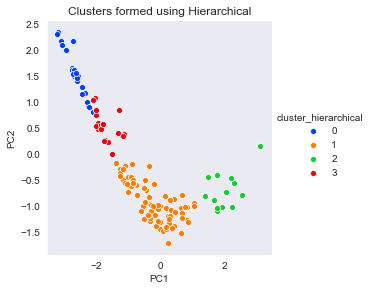

In [49]:
# Plotting clusters -kmeans
sns.pairplot(data=country_km, x_vars=["PC1"], y_vars=["PC2"], hue = "cluster_hierarchical", height=4,palette="bright")
plt.title("Clusters formed using Hierarchical")

In [50]:
# Checking distribution of clusters formed
country_orig["cluster_hierarchical"].value_counts()

1    75
0    23
3    20
2    13
Name: cluster_hierarchical, dtype: int64

#### Visualizing clusters formed by Hierarchical

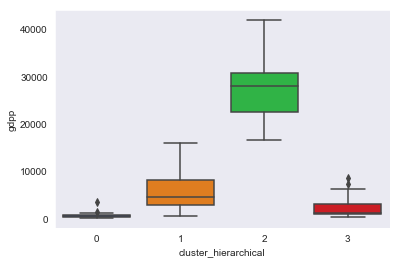

In [51]:
# Plot distribution for gdpp
sns.boxplot(x="cluster_hierarchical",y="gdpp",data=country_orig,palette="bright")

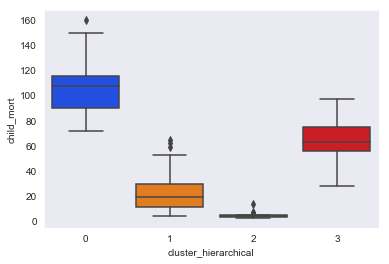

In [52]:
# Plot distribution for child mort
sns.boxplot(x="cluster_hierarchical",y="child_mort",data=country_orig,palette="bright")

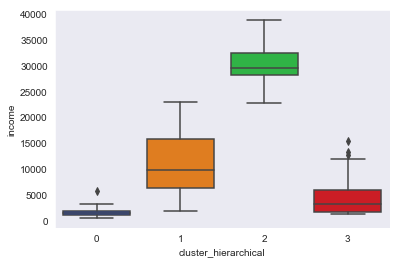

In [53]:
# Plot distribution for income
sns.boxplot(x="cluster_hierarchical",y="income",data=country_orig,palette="bright")

Observations:- <br>
* Cluster 0 - Lowest gdpp, Lowest income, Highest child_mort <br>
* Cluster 1 - High gdpp, High income, Low child_mort <br>
* Cluster 2 - Highest gdpp, Highest income, Lowest child_mort <br>
* Cluster 3 - Low gdpp, Low income, High child_mort <br>

Observations:- <br>
1. Clustering formed using kmeans is more defined.
2. We will use clusters formed by kmeans for further analysis

### Analysis for clusters (kmeans)

### Conclusion

#### List countries in cluster with lowest income, lowest gdpp and highest child mort

In [54]:
country_1 = country_orig[country_orig["cluster_kmeans"]==1]

In [55]:
country_1.sort_values(by=["child_mort","life_expec"],ascending=False).head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_kmeans,cluster_hierarchical
105,Sierra Leone,160.0,67.032,52.2690,137.655,1220,17.20,55.0,5.20,399,1,0
24,Chad,150.0,330.096,40.6341,390.195,1930,6.39,56.5,6.59,897,1,0
78,Mali,137.0,161.424,35.2584,248.508,1870,4.37,59.5,6.55,708,1,0
90,Niger,123.0,77.256,17.9568,170.868,814,2.55,58.8,7.49,348,1,0
3,Angola,119.0,2199.190,100.6050,1514.370,5900,22.40,60.1,6.16,3530,1,0


### Recommendation - Countries needing aid
Cluster 1 has countries which have lowest income, gdpp and highest child_mort. We will use child mortatlity and life expectancy factors to identify the countries for funds. These additional funds can be utilised for improving the health condition of the country. <br>

**Top 5 countries that need aid are**
    1. Sierra Leone
    2. Chad
    3. Mali
    4. Niger
    5. Angola

### Checking income, gdpp and child_mort for recommended countries

In [56]:
# Calculate mean for income, gdpp and child_mort
income_mean = country_data["income"].mean()
gdpp_mean = country_data["gdpp"].mean()
child_mort_mean = country_data["child_mort"].mean()

income_mean, gdpp_mean, child_mort_mean

(17144.688622754493, 12964.155688622754, 38.270059880239515)

In [57]:
# Creating datafroma for countries with aid
aid_countries = country_1[country_1["country"].isin(["Sierra Leone","Chad","Mali","Niger","Angola"])]

Text(1, 16100, "('Income Mean', 17145)")

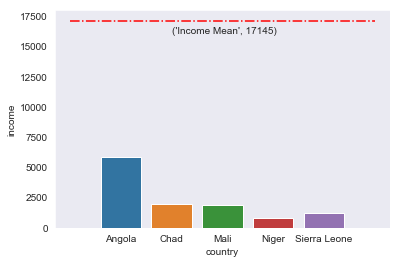

In [58]:
# Draw plot for income
sns.barplot(data = aid_countries, x = "country", y = "income")
plt.hlines(y=income_mean,xmax=5, xmin=-1,colors="r",linestyles="-.")
plt.annotate(('Income Mean',round(income_mean)), xy=(1, 17550), xytext=(1, 16100))

Text(1, 12200, "('gdpp Mean', 12964)")

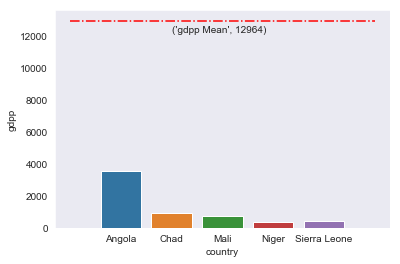

In [59]:
# Draw plot for gdpp
sns.barplot(data = aid_countries, x = "country", y = "gdpp")
plt.hlines(y=gdpp_mean,xmax=5, xmin=-1,colors="r",linestyles="-.")
plt.annotate(('gdpp Mean',round(gdpp_mean)), xy=(1, 12900), xytext=(1, 12200))

Text(1, 32, "('child mort Mean', 38)")

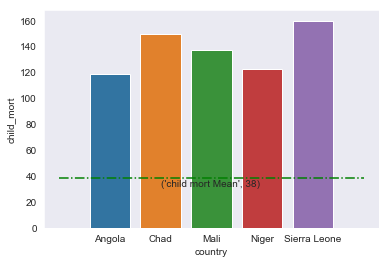

In [60]:
# Draw plot for child_mort
sns.barplot(data = aid_countries, x = "country", y = "child_mort")
plt.hlines(y=child_mort_mean,xmax=5, xmin=-1,colors="g",linestyles="-.")
plt.annotate(('child mort Mean',round(child_mort_mean)), xy=(1, 32), xytext=(1, 32))

#### Observation
1. Mean income for aid countries is much below income mean
1. Mean gdpp for aid countries is much below gdpp mean
1. Mean child_mort for aid countries is much above child_mort mean